In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import shape
from tqdm import tqdm
import random
import sklearn

In [2]:
import warnings

# 날씨데이터

In [3]:
wather = pd.read_csv('D:/data/전처리 완료 파일/날씨1.csv', encoding = 'utf-8')

In [4]:
wather

,Unnamed: 0,tm,stnNm,sumRn,maxWd
0,0,2010-01-01,서울,NaN,70.0
1,1,2010-01-02,서울,1.4,70.0
2,2,2010-01-03,서울,NaN,290.0
3,3,2010-01-04,서울,14.2,70.0
4,4,2010-01-05,서울,0.0,290.0
...,...,...,...,...,...
19300,359,2021-12-26,부산,NaN,270.0
19301,360,2021-12-27,부산,NaN,250.0
19302,361,2021-12-28,부산,NaN,270.0
19303,362,2021-12-29,부산,NaN,250.0


In [5]:
wather = wather.drop(columns = 'Unnamed: 0')
wather['tm'] = wather['tm'].apply(lambda x: x.replace('-',''))
wather = wather.rename(columns = {'tm':'침수시작'})

In [6]:
wather = wather.fillna(0)

In [7]:
wather = wather.drop(columns = 'maxWd')

In [8]:
wa_se = wather[wather['stnNm'] == '서울']
wa_jj = wather[wather['stnNm'] == '제주'].reset_index().drop(columns = 'index')
wa_su = wather[wather['stnNm'] == '서귀포'].reset_index().drop(columns = 'index')
wa_mi = wather[wather['stnNm'] == '밀양'].reset_index().drop(columns = 'index')
wa_bu = wather[wather['stnNm'] == '부산'].reset_index().drop(columns = 'index')

In [9]:
wa_mi

,침수시작,stnNm,sumRn
0,20100101,밀양,0.0
1,20100102,밀양,0.0
2,20100103,밀양,0.0
3,20100104,밀양,0.5
4,20100105,밀양,0.0
...,...,...,...
4366,20211226,밀양,0.0
4367,20211227,밀양,0.0
4368,20211228,밀양,0.0
4369,20211229,밀양,0.0


In [10]:
wa_se['sumRnn'] = 0.0
for i in range(len(wa_se)):
    if i == 0:
        wa_se['sumRnn'][i] = 0
    else:
        wa_se['sumRnn'][i] = wa_se['sumRn'][i -1]
        
        
        
wa_jj['sumRnn'] = 0.0
for i in range(len(wa_jj)):
    if i == 0:
        wa_jj['sumRnn'][i] = 0
    else:
        wa_jj['sumRnn'][i] = wa_jj['sumRn'][i -1]
        
        
        
wa_su['sumRnn'] = 0.0
for i in range(len(wa_su)):
    if i == 0:
        wa_su['sumRnn'][i] = 0
    else:
        wa_su['sumRnn'][i] = wa_su['sumRn'][i -1]

wa_mi['sumRnn'] = 0.0
for i in range(len(wa_mi)):
    if i == 0:
        wa_mi['sumRnn'][i] = 0
    else:
        wa_mi['sumRnn'][i] = wa_mi['sumRn'][i -1]
        
        
        
wa_bu['sumRnn'] = 0.0
for i in range(len(wa_mi)):
    if i == 0:
        wa_bu['sumRnn'][i] = 0
    else:
        wa_bu['sumRnn'][i] = wa_bu['sumRn'][i -1]
        
        
wa_se['강수량'] = wa_se.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_jj['강수량'] = wa_jj.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_su['강수량'] = wa_su.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_mi['강수량'] = wa_mi.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)
wa_bu['강수량'] = wa_bu.apply(lambda x: x['sumRn'] + x['sumRnn'], axis = 1)

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [11]:
wa_se

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20100101,서울,0.0,0.0,0.0
1,20100102,서울,1.4,0.0,1.4
2,20100103,서울,0.0,1.4,1.4
3,20100104,서울,14.2,0.0,14.2
4,20100105,서울,0.0,14.2,14.2
...,...,...,...,...,...
1816,20141226,서울,0.0,0.0,0.0
1817,20141227,서울,0.0,0.0,0.0
1818,20141228,서울,0.0,0.0,0.0
1819,20141229,서울,0.0,0.0,0.0


In [12]:
wa_jj

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20100101,제주,0.0,0.0,0.0
1,20100102,제주,0.0,0.0,0.0
2,20100103,제주,0.0,0.0,0.0
3,20100104,제주,1.0,0.0,1.0
4,20100105,제주,1.0,1.0,2.0
...,...,...,...,...,...
4366,20211226,제주,5.2,0.0,5.2
4367,20211227,제주,0.1,5.2,5.3
4368,20211228,제주,0.0,0.1,0.1
4369,20211229,제주,0.4,0.0,0.4


In [13]:
wa_su

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20100101,서귀포,0.0,0.0,0.0
1,20100102,서귀포,0.0,0.0,0.0
2,20100103,서귀포,0.0,0.0,0.0
3,20100104,서귀포,0.5,0.0,0.5
4,20100105,서귀포,0.0,0.5,0.5
...,...,...,...,...,...
4366,20211226,서귀포,1.0,0.0,1.0
4367,20211227,서귀포,0.0,1.0,1.0
4368,20211228,서귀포,0.0,0.0,0.0
4369,20211229,서귀포,0.1,0.0,0.1


In [14]:
wa_mi

,침수시작,stnNm,sumRn,sumRnn,강수량
0,20100101,밀양,0.0,0.0,0.0
1,20100102,밀양,0.0,0.0,0.0
2,20100103,밀양,0.0,0.0,0.0
3,20100104,밀양,0.5,0.0,0.5
4,20100105,밀양,0.0,0.5,0.5
...,...,...,...,...,...
4366,20211226,밀양,0.0,0.0,0.0
4367,20211227,밀양,0.0,0.0,0.0
4368,20211228,밀양,0.0,0.0,0.0
4369,20211229,밀양,0.0,0.0,0.0


# 타겟데이터

In [15]:
#타겟데이터 불러오기
target = gpd.read_file('D:/data/전처리 완료 파일/5816침수.shp', encoding = 'utf-8')
target = target.rename( columns = {'F_DSSTR_NM':'조사내용',
                                   'AVG_FLDWTL':'평균 침수위',
                                   'F_BEGIN_DE':'침수시작',
                                   'F_END_DE':'침수종료'})

target = target[['조사내용','침수시작','geometry']]
target['침수시작'] = target['침수시작'].astype('str').apply(lambda x: x.replace('-',''))
#target['침수종료'] = target['침수종료'].astype('str').apply(lambda x: x.replace('-',''))

In [16]:
target

,조사내용,침수시작,geometry
0,집중호우로 인한 침수,20060717,"MULTIPOLYGON (((305569.591 541282.720, 305562...."
1,6.30 집중호우 및 제 3호 테풍 에위니아,20060630,"MULTIPOLYGON (((132170.675 75268.038, 132179.9..."
2,수해(집중호우에 의한 농경지 침수),20060712,"POLYGON ((175843.497 554804.445, 175833.236 55..."
3,집중호우로 인한 침수,20060717,"POLYGON ((300544.199 558311.916, 300584.722 55..."
4,집중호우로 인한 침수,20060717,"POLYGON ((302272.440 542774.430, 302334.122 54..."
...,...,...,...
17774,2020년 8월 집중호우,20200802,"POLYGON ((305501.332 500715.095, 305514.440 50..."
17775,2020.7.28~8.11침수피해,20200801,"POLYGON ((181767.286 592274.179, 181774.908 59..."
17776,2020.7.28~8.11침수피해,20200801,"POLYGON ((182256.670 589501.021, 182261.577 58..."
17777,2020.7.28~8.11침수피해,20200801,"POLYGON ((181899.339 589930.342, 181901.121 58..."


# 서초구

In [17]:
df = pd.read_csv('D:/data/전처리 완료 파일/서초구.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.rename(columns = {'고도':'godo'})

In [18]:
data['경사도'].dropna()

0        3.0
1        3.0
2        3.0
3        2.0
4        0.0
        ... 
6184    18.0
6185    25.0
6186    18.0
6187    13.0
6188    12.0
Name: 경사도, Length: 5767, dtype: float64

In [19]:
#서초구 데이터 불러오기
df = pd.read_csv('D:/data/전처리 완료 파일/서초구.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.rename(columns = {'고도':'godo'})
data = data.dropna(subset = ['경사도','L2_NAME'])

#강수량 데이터와 타겟 데이터 서울시 기준으로 합치기
d = gpd.sjoin(data, target, how = 'left', op ='contains')
p = gpd.sjoin(data, target, how = 'left', op ='within')

d = pd.concat([p,d]). drop_duplicates()
d['조사내용'] = d['조사내용'].fillna(0)

b = ['20100921','20130723','20120706','20110727']
d['index_right']= d['조사내용'].apply(lambda x: x[:4] if x != 0 else x)

for i in tqdm(range(len(b))):
    d['index_right'] = d['index_right'].apply(lambda x: b[i] if x == b[i][:4] else x)
    
d['침수시작'] = d['index_right']



a = pd.merge(wa_se,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_se, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_se[wa_se['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b])
data_du = data.copy()

  0%|                                                                                         | 0/5764 [00:00<?, ?it/s]C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [20]:
data_du

,침수시작,stnNm,sumRn,sumRnn,강수량,Unnamed: 0,fid_left,godo,geometry,L2_NAME,경사도,습윤지수,수문거리,암거거리,제방거리,펌프장거리,하천거리,호수저수지거리,index_right,조사내용
0,20100921,서울,259.5,25.5,285.0,58,59.0,15,"POLYGON ((201371.242 546586.056, 201461.242 54...",교통지역,1.0,5.176471,374.935293,0.000000,353.077823,29578.677327,864.343405,412.145346,20100921,2010년 서울시 침수흔적
1,20100921,서울,259.5,25.5,285.0,95,96.0,16,"POLYGON ((201281.242 546316.056, 201371.242 54...",자연초지,1.0,0.000000,573.212107,46.818056,193.161311,29421.772187,974.720769,136.823921,20100921,2010년 서울시 침수흔적
2,20100921,서울,259.5,25.5,285.0,729,730.0,15,"POLYGON ((201641.242 544156.056, 201731.242 54...",주거지역,2.0,4.769231,1776.361815,62.449039,1318.228674,27524.579036,1357.759292,1159.056899,20100921,2010년 서울시 침수흔적
3,20100921,서울,259.5,25.5,285.0,730,731.0,14,"POLYGON ((201731.242 544156.056, 201821.242 54...",교통지역,1.0,5.602941,1838.509596,0.000000,1361.890306,27466.164907,1326.709686,1201.321294,20100921,2010년 서울시 침수흔적
4,20100921,서울,259.5,25.5,285.0,772,773.0,16,"POLYGON ((201551.242 544066.056, 201641.242 54...",상업지역,2.0,5.607595,1670.072286,14.378974,1362.282789,27514.976240,1313.210040,1206.350302,20100921,2010년 서울시 침수흔적
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,0,서울,76.5,0.0,76.5,3041,3042.0,48,"POLYGON ((201731.242 540826.056, 201821.242 54...",교통지역,3.0,5.224490,195.801035,54.981253,56.832494,25023.419471,55.736363,262.442857,0,0
5760,0,서울,32.5,8.0,40.5,3139,3140.0,46,"POLYGON ((201641.242 540736.056, 201731.242 54...",교통지역,5.0,4.686957,123.489944,41.144564,52.435792,25024.511751,52.021714,305.914293,0,0
5761,0,서울,13.0,0.0,13.0,3140,3141.0,44,"POLYGON ((201731.242 540736.056, 201821.242 54...",교통지역,3.0,5.798165,206.715630,105.787167,99.540016,24960.247434,100.254012,338.661622,0,0
5762,0,서울,13.0,0.0,13.0,3547,3548.0,33,"POLYGON ((204521.242 540376.056, 204611.242 54...",주거지역,2.0,6.511111,771.279492,15.762829,196.158954,22781.605345,53.229011,678.827400,0,0


In [21]:
data_du['godo'].value_counts()

26     87
16     87
23     87
28     86
22     81
       ..
530     1
526     1
506     1
502     1
527     1
Name: godo, Length: 411, dtype: int64

# 강남구

In [22]:
#강남구 데이터 불러오기
df = pd.read_csv('D:/data/전처리 완료 파일/강남구.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.rename(columns = {'고도':'godo'})
data = data.dropna(subset = ['경사도','L2_NAME'])


#강수량 데이터와 타겟 데이터 서울시 기준으로 합치기
d = gpd.sjoin(data, target, how = 'left', op ='contains')
p = gpd.sjoin(data, target, how = 'left', op ='within')

d = pd.concat([p,d]). drop_duplicates()

d['조사내용'] = d['조사내용'].fillna(0)

b = ['20100921','20130723','20120706','20110727','20140821']
d['index_right']= d['조사내용'].apply(lambda x: x[:4] if x != 0 else x)

for i in tqdm(range(len(b))):
    d['index_right'] = d['index_right'].apply(lambda x: b[i] if x == b[i][:4] else x)
    
d['침수시작'] = d['index_right']



a = pd.merge(wa_se,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_se, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_se[wa_se['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b])
data_ga = data.copy()

  0%|                                                                                         | 0/3965 [00:00<?, ?it/s]C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [23]:
data_ga['godo'].value_counts()

21     168
23     160
22     158
16     154
20     140
      ... 
280      1
252      1
248      1
232      1
281      1
Name: godo, Length: 241, dtype: int64

# 서귀포

In [24]:
df = pd.read_csv('D:/data/전처리 완료 파일/서귀포.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.dropna(subset = ['경사도','LV2_NAME'])



d = gpd.sjoin(data, target, how = 'left', op ='contains')
p = gpd.sjoin(data, target, how = 'left', op ='within')

d = pd.concat([p,d]). drop_duplicates()
d =d.drop(columns = ['Unnamed: 0','index_right'])
d['조사내용'] = d['조사내용'].fillna(0)

In [25]:
a = pd.merge(wa_su,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_su, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_su[wa_su['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b])
data_su = data.copy()

  0%|                                                                                        | 0/80418 [00:00<?, ?it/s]C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [26]:
data_su

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20120827,서귀포,92.5,0.0,92.5,1061.0,5,"POLYGON ((193722.765 96676.017, 193812.765 966...",주거지역,2.0,0.000000,1067.556561,70.121754,52940.569390,926.987011,1051.232668,72.680265,태풍'볼라벤'으로 인한 침수
1,20120827,서귀포,92.5,0.0,92.5,2985.0,45,"POLYGON ((189312.765 94516.017, 189402.765 945...",주거지역,2.0,5.120690,3096.096244,85.929968,51951.578305,90.739679,589.319413,2970.293252,태풍'볼라벤'으로 인한 침수
2,20120827,서귀포,92.5,0.0,92.5,17128.0,5,"POLYGON ((188682.765 87226.017, 188772.765 872...",교통시설지역,2.0,5.330508,2313.311811,0.000000,57747.772271,286.113019,789.341656,0.000000,태풍'볼라벤'으로 인한 침수
3,20120827,서귀포,92.5,0.0,92.5,48237.0,368,"POLYGON ((140352.765 80206.017, 140442.765 802...",주거지역,3.0,6.356164,2075.671729,125.045930,59925.578206,126.827496,1277.667217,8371.069717,태풍'볼라벤'으로 인한 침수
4,20120827,서귀포,92.5,0.0,92.5,75092.0,5,"POLYGON ((166632.765 74896.017, 166722.765 748...",교통시설지역,3.0,4.754098,1161.141245,0.000000,62550.599812,347.746431,942.720831,0.000000,태풍'볼라벤'으로 인한 침수
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80413,NaN,서귀포,12.4,0.1,12.5,85918.0,15,"POLYGON ((152502.765 71656.017, 152592.765 716...",과수원,1.0,6.169014,46.869962,0.000000,65737.657613,0.000000,84.364898,392.711306,0
80414,NaN,서귀포,17.7,39.2,56.9,86040.0,16,"POLYGON ((151962.765 71566.017, 152052.765 715...",밭,2.0,6.517241,372.623203,0.000000,65885.688728,0.000000,599.165015,611.099736,0
80415,NaN,서귀포,49.5,0.0,49.5,86296.0,7,"POLYGON ((153132.765 71386.017, 153222.765 713...",논,1.0,6.465517,186.298359,81.926578,65943.618518,0.000000,479.252676,82.397255,0
80416,NaN,서귀포,38.9,0.0,38.9,86450.0,15,"POLYGON ((150162.765 71206.017, 150252.765 712...",밭,3.0,5.677419,782.809168,85.573936,66468.763892,129.777024,15.550022,98.168437,0


# 제주

In [27]:
df = pd.read_csv('D:/data/전처리 완료 파일/제주.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.dropna(subset = ['경사도','LV2_NAME'])



d = gpd.sjoin(data, target, how = 'left', op ='contains')
p = gpd.sjoin(data, target, how = 'left', op ='within')

d = pd.concat([p,d]). drop_duplicates()

d =d.drop(columns = ['Unnamed: 0','index_right'])
d['조사내용'] = d['조사내용'].fillna(0)

a = pd.merge(wa_jj,pd.DataFrame(d), how = 'inner', on = '침수시작')


b = pd.merge(pd.DataFrame(d),wa_jj, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_jj[wa_jj['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b])
data_jj = data.copy()

  0%|                                                                                        | 0/90765 [00:00<?, ?it/s]C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [28]:
data_jj

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,조사내용
0,20110911,제주,10.5,29.5,40.0,12347.0,100,"POLYGON ((167986.326 101786.804, 168076.326 10...",과수원,4.0,5.119048,3352.218187,1401.411999,36263.798202,1103.088271,1072.856984,3545.626199,9.11집중호우
1,20110911,제주,10.5,29.5,40.0,13723.0,121,"POLYGON ((168166.326 101426.804, 168256.326 10...",과수원,5.0,5.589744,3438.518194,1503.749855,36656.138893,833.036070,749.509507,3945.904209,9.11 집중호우
2,20110911,제주,10.5,29.5,40.0,14082.0,126,"POLYGON ((168166.326 101336.804, 168256.326 10...",과수원,3.0,5.193548,3415.648536,1466.284943,36743.569693,755.019234,664.502753,4022.295350,9.11 집중호우
3,20110911,제주,10.5,29.5,40.0,14841.0,112,"POLYGON ((169156.326 101156.804, 169246.326 10...",과수원,2.0,7.110092,4352.491026,910.188658,37164.390620,948.156366,957.810018,4346.970316,9.11집중호우
4,20110911,제주,10.5,29.5,40.0,19422.0,173,"POLYGON ((167806.326 100076.804, 167896.326 10...",밭,3.0,6.060606,2974.285113,173.502744,37887.933340,174.567724,466.620307,5001.466492,9.11집중호우
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90760,NaN,제주,13.4,0.0,13.4,98912.0,68,"POLYGON ((129106.326 76946.804, 129286.326 769...",과수원,1.0,7.228261,3014.307384,874.380258,67237.799714,5.211383,520.214087,6270.637139,0
90761,NaN,제주,13.5,0.1,13.6,98913.0,67,"POLYGON ((129286.326 76946.804, 129376.326 769...",과수원,2.0,6.750000,3098.999545,813.588510,67197.459394,0.000000,529.537435,6449.200982,0
90762,NaN,제주,15.5,0.0,15.5,98919.0,11,"POLYGON ((123166.326 76856.804, 123256.326 768...",밭,1.0,0.000000,4723.781196,424.634849,69003.252777,0.000000,366.689988,551.229759,0
90763,NaN,제주,47.8,10.4,58.2,99013.0,60,"POLYGON ((129106.326 76496.804, 129196.326 764...",밭,1.0,5.025000,3422.711036,807.615302,67680.440661,0.000000,70.214087,6229.112873,0


# 밀양

In [29]:
df = pd.read_csv('D:/data/전처리 완료 파일/밀양.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
data = data.dropna(subset = ['경사도','LV2_NAME'])



d = gpd.sjoin(data, target, how = 'left', op ='contains')
p = gpd.sjoin(data, target, how = 'left', op ='within')

d = pd.concat([p,d]). drop_duplicates()

d =d.drop(columns = ['Unnamed: 0','index_right'])
d['조사내용'] = d['조사내용'].fillna(0)

a = pd.merge(wa_mi,pd.DataFrame(d), how = 'inner', on = '침수시작')
a = a.drop(14)

b = pd.merge(pd.DataFrame(d),wa_mi, how = 'left', on = '침수시작')
b = b[b['stnNm'].isna()]
b = b.reset_index().drop(columns = 'index')
c = wa_mi[wa_mi['sumRn'] >= 10].reset_index().drop(columns = 'index')

e = pd.DataFrame()


for x in tqdm(range(len(b))):
    q = int(np.random.randint(len(c)))
    b['sumRn'][x] = c['sumRn'][q]
    b['sumRnn'][x] = c['sumRnn'][q]
    b['강수량'][x] = c['강수량'][q]
    b['stnNm'][x] = c['stnNm'][q]
    
    
data = pd.concat([a,b])

data_mi = data.copy()


  0%|                                                                                        | 0/87089 [00:00<?, ?it/s]C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [30]:
data_mi['godo']

0        42
1        43
2        41
3        30
4        31
         ..
87084     8
87085     7
87086     8
87087     7
87088     7
Name: godo, Length: 87862, dtype: int64

In [31]:
print(len(data_su.columns))
print(len(data_ga.columns))
print(len(data_du.columns))
print(len(data_jj.columns))
print(len(data_mi.columns))

18
20
20
18
17


# 데이터 합치기

In [32]:
data1 = pd.concat([data_du,data_ga])
data2 = pd.concat([data_su,data_jj])
data_mi['해안가거리'] = 17180.594379799597

In [33]:
data1 = data1.drop(columns = '암거거리')
data1 = data1.drop(columns = 'index_right')
data1 = data1.drop(columns = 'Unnamed: 0')
data1['해안가거리'] = 17180.594379799597
data1 = data1.rename(columns = {'L2_NAME':'LV2_NAME'})

In [34]:
data = pd.concat([data1,data2,data_mi])
#data = pd.concat([data1,data2])

In [35]:
data['조사내용'] = data['조사내용'].apply(lambda x: 1 if x != 0 else x)#

In [36]:
data

,침수시작,stnNm,sumRn,sumRnn,강수량,fid_left,godo,geometry,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리
0,20100921,서울,259.5,25.5,285.0,59.0,15,"POLYGON ((201371.242 546586.056, 201461.242 54...",교통지역,1.0,5.176471,374.935293,353.077823,29578.677327,864.343405,412.145346,1,17180.59438
1,20100921,서울,259.5,25.5,285.0,96.0,16,"POLYGON ((201281.242 546316.056, 201371.242 54...",자연초지,1.0,0.000000,573.212107,193.161311,29421.772187,974.720769,136.823921,1,17180.59438
2,20100921,서울,259.5,25.5,285.0,730.0,15,"POLYGON ((201641.242 544156.056, 201731.242 54...",주거지역,2.0,4.769231,1776.361815,1318.228674,27524.579036,1357.759292,1159.056899,1,17180.59438
3,20100921,서울,259.5,25.5,285.0,731.0,14,"POLYGON ((201731.242 544156.056, 201821.242 54...",교통지역,1.0,5.602941,1838.509596,1361.890306,27466.164907,1326.709686,1201.321294,1,17180.59438
4,20100921,서울,259.5,25.5,285.0,773.0,16,"POLYGON ((201551.242 544066.056, 201641.242 54...",상업지역,2.0,5.607595,1670.072286,1362.282789,27514.976240,1313.210040,1206.350302,1,17180.59438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87084,NaN,밀양,44.0,1.0,45.0,90673.0,8,"POLYGON ((361511.228 308048.781, 361601.228 30...",논,1.0,0.000000,1840.285396,57.368038,26785.398912,0.000000,267.418982,0,17180.59438
87085,NaN,밀양,112.2,18.0,130.2,90687.0,7,"POLYGON ((360251.228 307958.781, 360341.228 30...",논,0.0,0.000000,1678.590163,139.430798,26287.785004,0.000000,270.232059,0,17180.59438
87086,NaN,밀양,17.4,0.0,17.4,90688.0,8,"POLYGON ((360701.228 307958.781, 360791.228 30...",하우스재배지,0.0,0.000000,1941.411712,286.279258,26488.317149,0.000000,718.765896,0,17180.59438
87087,NaN,밀양,62.7,1.3,64.0,90705.0,7,"POLYGON ((360341.228 307868.781, 360431.228 30...",논,0.0,0.000000,1675.710881,176.743896,26408.180566,27.292941,379.260178,0,17180.59438


In [37]:
data.describe().drop(columns = ['fid_left','조사내용'])

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
count,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000,269789.000000
mean,36.451322,12.605565,49.056886,306.703524,9.188840,4.141945,2052.464531,669.133038,39247.349003,178.628723,608.632281,10375.705395
std,38.516399,29.782594,54.763435,306.817322,8.739826,1.667217,1832.830274,867.469504,18697.791877,271.602583,610.748862,6177.150690
min,2.900000,0.000000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,18.100000,84.000000,2.000000,3.276596,673.184581,158.970162,22060.263770,0.000000,218.154857,4707.051202
50%,23.700000,0.500000,31.000000,211.000000,5.000000,4.445455,1454.113723,400.125800,44073.404666,79.891681,435.472425,10324.725436
75%,41.500000,11.700000,56.000000,426.000000,14.000000,5.270833,2966.551760,804.677801,54862.989335,234.648884,772.404079,17180.594380
max,310.000000,310.000000,505.500000,1915.000000,53.000000,24.000000,11369.659146,7219.142594,78194.675494,3985.353300,5228.208218,17180.594380


# 컬럼데이터 범주화

In [38]:
data = data.drop(columns = ['fid_left','geometry','침수시작','stnNm'])
#datadf = data.drop(columns = ['fid_left','geometry','침수시작','stnNm'])

In [39]:
data['LV2_NAME'] = data['LV2_NAME'].astype('str')

In [40]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: x.replace(' ',''))

In [41]:
list_1 = ['주거지역', '공업지역', '상업지역','공공시설지역','교통지역', '교통시설지역', '문화·체육·휴양지역','위락시설지역']
list_2 = ['논', '밭', '시설재배지', '과수원', '기타재배지', '하우스재배지']
list_3 = ['침엽수림','혼효림','활엽수림']
list_4 = ['자연초지','골프장','기타초지','인공초지']
list_5 = ['내륙습지', '연안습지','내륙습지(수변식생)']
list_6 = ['기타나지','채광지역','자연나지']
list_7 = ['내륙수', '해양수']

In [42]:
def lv2(x):
    if x in list_1:
        return '시가화전조지역'
    elif x in list_2:
        return '농업지역'
    elif x in list_3:
        return '산림지역'
    elif x in list_4:
        return '초지'
    elif x in list_5:
        return '습지'
    elif x in list_6:
        return '나지'
    elif x in list_7:
        return '수역'
    else:
        '0'

In [43]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: lv2(x))

In [44]:
data['godo'].unique()

array([  15,   16,   14, ..., 1859, 1843, 1816], dtype=int64)

# 원핫인코딩

In [45]:
data = pd.get_dummies(data,columns = ['LV2_NAME'])

In [46]:
data = data.drop_duplicates()

In [47]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,259.5,25.5,285.0,15,1.0,5.176471,374.935293,353.077823,29578.677327,864.343405,412.145346,1,17180.59438,0,0,0,0,0,1,0
1,259.5,25.5,285.0,16,1.0,0.000000,573.212107,193.161311,29421.772187,974.720769,136.823921,1,17180.59438,0,0,0,0,0,0,1
2,259.5,25.5,285.0,15,2.0,4.769231,1776.361815,1318.228674,27524.579036,1357.759292,1159.056899,1,17180.59438,0,0,0,0,0,1,0
3,259.5,25.5,285.0,14,1.0,5.602941,1838.509596,1361.890306,27466.164907,1326.709686,1201.321294,1,17180.59438,0,0,0,0,0,1,0
4,259.5,25.5,285.0,16,2.0,5.607595,1670.072286,1362.282789,27514.976240,1313.210040,1206.350302,1,17180.59438,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87084,44.0,1.0,45.0,8,1.0,0.000000,1840.285396,57.368038,26785.398912,0.000000,267.418982,0,17180.59438,0,1,0,0,0,0,0
87085,112.2,18.0,130.2,7,0.0,0.000000,1678.590163,139.430798,26287.785004,0.000000,270.232059,0,17180.59438,0,1,0,0,0,0,0
87086,17.4,0.0,17.4,8,0.0,0.000000,1941.411712,286.279258,26488.317149,0.000000,718.765896,0,17180.59438,0,1,0,0,0,0,0
87087,62.7,1.3,64.0,7,0.0,0.000000,1675.710881,176.743896,26408.180566,27.292941,379.260178,0,17180.59438,0,1,0,0,0,0,0


# 학습데이터 검증데이터 분리

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df,dff = train_test_split(data, test_size = 0.2, shuffle = True, stratify=data['조사내용'], random_state=42)

In [50]:
dff = dff.reset_index().drop(columns = 'index')
df = df.reset_index().drop(columns = 'index')
data = df.copy()

# 학습데이터 증강

In [51]:
df_1 = df[df['조사내용'] != 0]
df_2 = df[df['조사내용'] != 0]
df_3 = df[df['조사내용'] != 0]
df_4 = df[df['조사내용'] != 0]
df_5 = df[df['조사내용'] != 0]

In [52]:
df_2['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_2['강수량'] = df_2['sumRn'] + df_2['sumRnn'] 

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
df_3['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_3['강수량'] = df_2['sumRn'] + df_2['sumRnn'] 

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
df_4['sumRn'] = df_1['sumRn'].apply(lambda x: x + np.random.randint(20,100)).values
df_4['강수량'] = df_4['sumRn'] + df_4['sumRnn'] 

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
df_10 = pd.concat([df_2, df_3, df_4])
df_11 = pd.concat([df_2, df_3, df_4])
df_12 = pd.concat([df_2, df_3, df_4])
df_13 = pd.concat([df_2, df_3, df_4])

In [56]:
df_11['sumRn'] = df_10['sumRn'].apply(lambda x: x - np.random.randint(20)).values
df_11['강수량'] = df_11['sumRn'] + df_11['sumRnn'] 

In [57]:
df_12['sumRn'] = df_12['sumRn'].apply(lambda x: x - np.random.randint(20)).values
df_12['강수량'] = df_12['sumRn'] + df_12['sumRnn'] 

In [58]:
data = pd.concat([df,df_10,df_11,df_12])
data = sklearn.utils.shuffle(data).reset_index().drop(columns = 'index')
dff = dff.reset_index().drop(columns = 'index')

In [59]:
#data = pd.concat([data,df,df_10,df_11,df_12])
#data = sklearn.utils.shuffle(data).reset_index().drop(columns = 'index')

In [74]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,-0.467492,-0.052239,-0.501104,0.155224,0.000000,-0.240145,-0.189533,0.630143,0.570189,3.248671,-0.076701,0,-0.321322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.037152,-0.052239,-0.194260,-0.525373,-0.272727,0.593487,0.464982,-0.387307,0.629378,1.113522,1.297711,0,-0.808347,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.380805,2.626866,0.353201,-0.274627,-0.363636,0.791956,2.495267,-0.471011,-0.167721,1.089797,-0.794505,0,-0.523690,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.597523,5.776119,3.408389,-0.331343,-0.363636,0.785652,-0.527867,-0.460566,-1.150644,-0.325380,-0.160799,1,0.541767,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.000000,5.097015,3.494481,-0.005970,0.000000,0.483019,-0.128087,-0.591263,0.405242,-0.325380,0.130183,0,-0.337672,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230773,-0.065015,-0.052239,-0.214128,-0.364179,-0.363636,0.737023,-0.183973,-0.352066,0.639628,2.573324,-0.514521,0,-0.488684,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230774,0.334365,-0.052239,0.070640,0.647761,-0.272727,0.099663,0.346568,0.707315,0.040373,-0.325380,0.507048,0,0.104509,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230775,-0.436533,-0.052239,-0.479029,-0.176119,1.181818,-0.502319,-0.440516,-0.033860,-1.139482,-0.325380,0.364232,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230776,0.077399,-0.052239,-0.112583,0.002985,0.090909,-0.940558,1.331609,-0.016411,0.194005,-0.277582,-0.128281,0,-0.190173,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
dff

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,57.5,2.0,59.5,195,11.0,3.638462,433.335294,16.959181,17838.291326,61.319264,15.268719,0,17180.594380,0,0,1,0,0,0,0
1,47.3,0.0,47.3,1005,19.0,4.956757,1310.137504,4153.906836,54985.159978,198.731466,3375.717231,0,9819.195623,0,0,1,0,0,0,0
2,14.2,38.3,52.5,926,6.0,3.973333,5096.939506,2453.039770,51038.958703,1067.533468,918.479005,0,12269.911181,0,0,1,0,0,0,0
3,29.0,0.0,29.0,516,14.0,0.000000,986.505534,988.803570,3332.410190,20.909271,1195.335586,0,17180.594380,0,0,1,0,0,0,0
4,21.0,0.0,21.0,616,26.0,2.860465,2109.616844,1765.827725,24248.237733,8.934219,2018.829551,0,17180.594380,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53852,62.0,5.5,67.5,31,3.0,5.412500,1228.704884,1156.737773,25983.628313,542.548400,1482.183661,0,17180.594380,0,0,0,0,0,1,0
53853,40.1,5.6,45.7,570,4.0,5.239669,3801.419829,1744.271089,50321.802099,296.159651,2099.497777,0,11531.609897,0,0,1,0,0,0,0
53854,206.0,193.2,399.2,426,4.0,5.515464,3332.358449,736.038045,51119.151895,247.556026,739.537976,0,8733.108844,0,0,0,0,0,0,1
53855,25.0,0.0,25.0,322,13.0,2.013889,1054.142787,700.091731,21748.051924,68.678398,657.759308,0,17180.594380,0,0,1,0,0,0,0


# 스케일링

In [62]:
data.columns

Index(['sumRn', 'sumRnn', '강수량', 'godo', '경사도', '습윤지수', '수문거리', '제방거리',
       '펌프장거리', '하천거리', '호수저수지거리', '조사내용', '해안가거리', 'LV2_NAME_나지',
       'LV2_NAME_농업지역', 'LV2_NAME_산림지역', 'LV2_NAME_수역', 'LV2_NAME_습지',
       'LV2_NAME_시가화전조지역', 'LV2_NAME_초지'],
      dtype='object')

In [63]:
dff.columns

Index(['sumRn', 'sumRnn', '강수량', 'godo', '경사도', '습윤지수', '수문거리', '제방거리',
       '펌프장거리', '하천거리', '호수저수지거리', '조사내용', '해안가거리', 'LV2_NAME_나지',
       'LV2_NAME_농업지역', 'LV2_NAME_산림지역', 'LV2_NAME_수역', 'LV2_NAME_습지',
       'LV2_NAME_시가화전조지역', 'LV2_NAME_초지'],
      dtype='object')

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
col = list(data.columns)
col.remove('조사내용')

#scaler = StandardScaler()
scaler = RobustScaler()

data[col] = scaler.fit_transform(data[col])
dff[col] = scaler.transform(dff[col])

In [65]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,-0.467492,-0.052239,-0.501104,0.155224,0.000000,-0.240145,-0.189533,0.630143,0.570189,3.248671,-0.076701,0,-0.321322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.037152,-0.052239,-0.194260,-0.525373,-0.272727,0.593487,0.464982,-0.387307,0.629378,1.113522,1.297711,0,-0.808347,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.380805,2.626866,0.353201,-0.274627,-0.363636,0.791956,2.495267,-0.471011,-0.167721,1.089797,-0.794505,0,-0.523690,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.597523,5.776119,3.408389,-0.331343,-0.363636,0.785652,-0.527867,-0.460566,-1.150644,-0.325380,-0.160799,1,0.541767,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.000000,5.097015,3.494481,-0.005970,0.000000,0.483019,-0.128087,-0.591263,0.405242,-0.325380,0.130183,0,-0.337672,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230773,-0.065015,-0.052239,-0.214128,-0.364179,-0.363636,0.737023,-0.183973,-0.352066,0.639628,2.573324,-0.514521,0,-0.488684,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230774,0.334365,-0.052239,0.070640,0.647761,-0.272727,0.099663,0.346568,0.707315,0.040373,-0.325380,0.507048,0,0.104509,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230775,-0.436533,-0.052239,-0.479029,-0.176119,1.181818,-0.502319,-0.440516,-0.033860,-1.139482,-0.325380,0.364232,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230776,0.077399,-0.052239,-0.112583,0.002985,0.090909,-0.940558,1.331609,-0.016411,0.194005,-0.277582,-0.128281,0,-0.190173,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
dff

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,조사내용,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,1.003096,0.097015,0.591611,0.005970,0.545455,-0.430523,-0.431540,-0.564773,-0.769618,-0.057387,-0.766627,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.687307,-0.052239,0.322296,2.423881,1.272727,0.221243,-0.047126,5.896955,0.357276,0.543167,5.369078,0,-0.042457,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.337461,2.805970,0.437086,2.188060,0.090909,-0.264962,1.613113,3.240276,0.237563,4.340229,0.882508,0,0.152040,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.120743,-0.052239,-0.081678,0.964179,0.818182,-2.229379,-0.189015,0.953204,-1.209671,-0.233997,1.388009,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.126935,-0.052239,-0.258278,1.262687,1.909091,-0.815164,0.303388,2.166882,-0.575165,-0.286333,2.891593,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53852,1.142415,0.358209,0.768212,-0.483582,-0.181818,0.446562,-0.082828,1.215510,-0.522520,2.045804,1.911753,0,0.541767,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53853,0.464396,0.365672,0.286976,1.125373,-0.090909,0.361115,1.045122,2.133211,0.215807,0.968973,3.038882,0,0.093446,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53854,5.600619,14.365672,8.090508,0.695522,-0.090909,0.497468,0.839472,0.558396,0.239996,0.756553,0.555787,0,-0.128652,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53855,-0.003096,-0.052239,-0.169978,0.385075,0.727273,-1.233712,-0.159361,0.502249,-0.651011,-0.025224,0.406471,0,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 샘플 모델링

In [67]:
data.isnull().sum()

sumRn               0
sumRnn              0
강수량                 0
godo                0
경사도                 0
습윤지수                0
수문거리                0
제방거리                0
펌프장거리               0
하천거리                0
호수저수지거리             0
조사내용                0
해안가거리               0
LV2_NAME_나지         0
LV2_NAME_농업지역       0
LV2_NAME_산림지역       0
LV2_NAME_수역         0
LV2_NAME_습지         0
LV2_NAME_시가화전조지역    0
LV2_NAME_초지         0
dtype: int64

In [68]:
# qw = data.drop(columns = '경사도')
# qww = dff.drop(columns = '경사도')

In [69]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report

In [70]:
n_splits = 10
sfk = StratifiedKFold(n_splits = n_splits, random_state = 42)

#y_pred = np.zeros(len(X_test))

y = data['조사내용']
X = data.drop(columns = '조사내용')

y_test = dff['조사내용']
X_test = dff.drop(columns = '조사내용')


# y_test = dff[dff['조사내용'] != 0]['조사내용']
# X_test = dff[dff['조사내용'] != 0].drop(columns = '조사내용')

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [71]:
from sklearn.metrics import f1_score

def evaluate_macroF1_lgb(truth, predictions):  

    # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483

    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)

    f1 = f1_score(truth, pred_labels, average='macro')

    return ('macroF1', f1, True) 

# LGBM

In [72]:
acu_av = []
f1_av = []
# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    lgbmm = LGBMClassifier(n_estimators = 1000, 
                          learning_rate= 0.05,
                          objective = 'binary',
                          max_depth = 30,
                          min_data_in_leaf = 50,
                          num_leaves = 1000,
                          metric = 'binary_logloss',
                          random_state = 42)
    lgbmm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbmm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.999101	valid_0's binary_logloss: 0.0173949
[200]	valid_0's auc: 0.999496	valid_0's binary_logloss: 0.0142475
[300]	valid_0's auc: 0.999629	valid_0's binary_logloss: 0.0161585
[400]	valid_0's auc: 0.99965	valid_0's binary_logloss: 0.0191634
Early stopping, best iteration is:
[184]	valid_0's auc: 0.99947	valid_0's binary_logloss: 0.0140751
교차검증 정확도 : 0.9946896410865811
교차검증 f1 : 0.6545893719806763
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
Training until validation scores don't improve for 300 rounds
[100]	valid_0's auc: 0.99917	valid_0's binary_logloss: 0.0177185
[200]	valid_0's auc: 0.999504	valid_0's binary_logloss: 0.0151361
[300]	valid_0's auc: 0.999585	valid_0's binary_logloss: 0.0178362
[400]	valid_0

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53430
           1       0.66      0.63      0.64       427

    accuracy                           0.99     53857
   macro avg       0.83      0.81      0.82     53857
weighted avg       0.99      0.99      0.99     53857



# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
X

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,-0.177370,-0.052239,-0.290393,0.083582,0.181818,0.099246,0.883491,0.825832,0.573795,0.320990,1.219556,-0.524293,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.281346,0.022388,0.058952,1.277612,-0.090909,0.079761,1.289265,-0.297583,0.243056,-0.309850,0.547830,0.030853,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.302752,-0.052239,-0.379913,0.483582,0.181818,-2.229379,-0.177308,-0.434105,0.473218,0.228112,-0.609909,0.027460,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.330275,0.059701,-0.366812,-0.397015,0.090909,0.059819,-0.393288,-0.591263,-1.078189,-0.325380,-0.313465,0.541767,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.036697,-0.052239,-0.137555,-0.250746,-0.363636,1.609494,1.673067,0.799423,0.656255,3.852156,0.556442,-0.256333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230773,-0.088685,1.417910,0.203057,-0.074627,1.090909,-0.809293,-0.489920,-0.150276,-1.021801,-0.258967,-0.257881,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230774,-0.348624,-0.052239,-0.412664,0.295522,-0.272727,0.228630,1.571462,0.799485,-0.095396,0.659697,-0.518439,-0.246646,0.0,1.0,0.0,0.0,0.0,0.0,0.0
230775,0.648318,0.283582,0.397380,-0.143284,0.727273,-0.314010,-0.518985,-0.388041,-0.806087,-0.325380,-0.460478,0.541767,0.0,0.0,1.0,0.0,0.0,0.0,0.0
230776,-0.412844,4.328358,0.823144,-0.400000,-0.363636,-2.229379,1.247402,-0.412887,0.749921,0.161084,-0.413436,-0.277962,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [77]:
rfc = RandomForestClassifier(n_estimators = 1000,
                             max_depth = 15,
                             criterion = 'gini',
                             min_samples_leaf = 50,
                             class_weight = 'balanced_subsample',
                             verbose = 100,
                             random_state = 42)
rfc.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 1000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 1000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
building tree 3 of 1000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
building tree 4 of 1000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s
building tree 5 of 1000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
building tree 6 of 1000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s
building tree 7 of 1000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s
building tree 8 of 1000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
building tree 9 of 1000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.6s re

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:   22.9s remaining:    0.0s
building tree 80 of 1000
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   23.2s remaining:    0.0s
building tree 81 of 1000
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   23.5s remaining:    0.0s
building tree 82 of 1000
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed:   23.8s remaining:    0.0s
building tree 83 of 1000
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed:   24.1s remaining:    0.0s
building tree 84 of 1000
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:   24.4s remaining:    0.0s
building tree 85 of 1000
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:   24.7s remaining:    0.0s
building tree 86 of 1000
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed:   25.0s remaining:    0.0s
building tree 87 of 1000
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:   25.3s remaining:    0.0s
building tree 88 of 1000
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:   

building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tree 364 of 1000
building tree 365 of 1000
building tree 366 of 1000
building tree 367 of 1000
building tree 368 of 1000
building tree 369 of 1000
building tre

building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tre

building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000
[Parallel(n_jobs=1)]: Done 1000 out o

RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                       min_samples_leaf=50, n_estimators=1000, random_state=42,
                       verbose=100)

In [78]:
#예측
y_pred = rfc.predict(X_test)

#정확도 측정
acu = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('교차검증 정확도 :',acu)
print('교차검증 f1 :', f1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     53430
           1       0.22      0.82      0.35       427

    accuracy                           0.98     53857
   macro avg       0.61      0.90      0.67     53857
weighted avg       0.99      0.98      0.98     53857



# XGboost

In [80]:
from xgboost import XGBClassifier

In [81]:
acu_av = []
f1_av = []






# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    lgbm = XGBClassifier(n_estimators = 1000, 
                         learning_rate= 0.05,
                         objective = 'binary:logistic',
                         max_depth = 15,
                         min_data_in_leaf = 50,
                         num_leaves = 1000,
                         metric = 'binary_logloss',
                         seed = 42)
    lgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { metric, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.98951
[100]	validation_0-auc:0.99915
[200]	validation_0-auc:0.99943
[300]	validation_0-auc:0.99955
[400]	validation_0-auc:0.99960
[500]	validation_0-auc:0.99962
[600]	validation_0-auc:0.99964
[700]	validation_0-auc:0.99964
[800]	validation_0-auc:0.99965
[900]	validation_0-auc:0.99965
[999]	validation_0-auc:0.99966
교차검증 정확도 : 0.9944296934474627
교차검증 f1 : 0.6470588235294119
[21:14:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { metric, min_data_in_leaf, num_leaves } might not be used.

  This may no

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53430
           1       0.65      0.64      0.64       427

    accuracy                           0.99     53857
   macro avg       0.82      0.82      0.82     53857
weighted avg       0.99      0.99      0.99     53857



# 로지스틱

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [84]:
logreg = LogisticRegression()

logreg.fit(X,y )

# scores = cross_val_score(logreg, X, y)

# print("교차 검증 점수: {}".format(scores))

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [85]:
#예측
y_pred = logreg.predict(X_test)

#정확도 측정
acu = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('교차검증 정확도 :',acu)
print('교차검증 f1 :', f1)

교차검증 정확도 : 0.9841431940137773
교차검증 f1 : 0.30681818181818177


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     53430
           1       0.23      0.44      0.31       427

    accuracy                           0.98     53857
   macro avg       0.62      0.72      0.65     53857
weighted avg       0.99      0.98      0.99     53857



# from sklearn.ensemble import GradientBoostingClassifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
acu_av = []
f1_av = []






# train데이터셋에서 건물의 비율을 동일하게하기 위해 StratifiedKFold 사용
for tr_idx, val_idx in sfk.split(data, data['조사내용']):
    X_train = X.iloc[tr_idx, :]
    y_train = y.iloc[tr_idx]

    X_val = X.iloc[val_idx, :]
    y_val = y.iloc[val_idx]

    #학습
    gbm = XGBClassifier(n_estimators = 1000, 
                         learning_rate= 0.05,
                         objective = 'binary:logistic',
                         max_depth = 15,
                         min_data_in_leaf = 50,
                         num_leaves = 1000,
                         metric = 'binary_logloss',
                         seed = 42)
    gbm.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric= 'auc', early_stopping_rounds= 300,verbose = 100,)
    
    #예측
    y_pred = lgbm.predict(X_test)
    
    #정확도 측정
    acu = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print('교차검증 정확도 :',acu)
    print('교차검증 f1 :', f1)
    
    acu_av.append(acu)
    f1_av.append(f1)

print('평군검증 정확도 : ',np.mean(acu_av))
print('평군검증 정확도 : ',np.mean(f1))

[21:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { metric, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.98951


C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-auc:0.99915
[200]	validation_0-auc:0.99943
[300]	validation_0-auc:0.99955
[400]	validation_0-auc:0.99960
[500]	validation_0-auc:0.99962
[600]	validation_0-auc:0.99964
[700]	validation_0-auc:0.99964
[800]	validation_0-auc:0.99965
[900]	validation_0-auc:0.99965
[999]	validation_0-auc:0.99966
교차검증 정확도 : 0.9944111257589543
교차검증 f1 : 0.6437869822485207
[21:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { metric, min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.99102
[100]	validation_0-auc:0.99901
[200]	validation_0-auc:0.99944
[300]	validation_0-auc:0.99955
[400]	validation_0-auc:0.99958
[500]	validation_0-auc:0.99960
[600]	validation_0-auc:0.99961
[7

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53430
           1       0.65      0.64      0.64       427

    accuracy                           0.99     53857
   macro avg       0.82      0.82      0.82     53857
weighted avg       0.99      0.99      0.99     53857



# from sklearn import svm

In [174]:
plt.plot(gbm.history["binary_logloss"], label="binary_logloss")
plt.plot(gbm.history["auc"], label="auc")
plt.legend()
plt.title('Loss')
# plt.savefig('loss.png', dpi=300)
plt.show()

AttributeError: 'XGBClassifier' object has no attribute 'history'

# 변수중요도

In [167]:
ip_lgbm = list(lgbm.feature_importances_)
ip_lgbmm = list(lgbmm.feature_importances_)
ip_rf = list(rfc.feature_importances_)
ip_gbm = list(gbm.feature_importances_)

In [168]:
ip = pd.DataFrame({'변수': list(X.columns)})

In [169]:
ip['ip_xg'] = ip_lgbm
ip['ip_lgbm'] = ip_lgbmm
ip['ip_lgbm'] = ip['ip_lgbm'] / ip['ip_lgbm'].sum()
ip['ip_rf'] = ip_rf
ip['ip_gbm'] = ip_gbm

ip['변수'][0] = '당일 강수량'
ip['변수'][1] = '전일 강수량'
ip['변수'][2] = '합일 강수량'
ip['변수'][3] = '고도'

ip.sort_values(by = 'ip_xg')

C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KU_BD_3\anaconda3\envs\bigdata\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KU_B

,변수,ip_xg,ip_lgbm,ip_rf,ip_gbm
16,LV2_NAME_습지,0.006738,0.000025,0.000010,0.006738
7,제방거리,0.006757,0.079679,0.018994,0.006757
10,호수저수지거리,0.007163,0.090850,0.009821,0.007163
5,습윤지수,0.008059,0.088537,0.018229,0.008059
15,LV2_NAME_수역,0.010095,0.000243,0.000049,0.010095
6,수문거리,0.015381,0.100389,0.021429,0.015381
12,LV2_NAME_나지,0.015681,0.000439,0.000120,0.015681
1,전일 강수량,0.016749,0.074263,0.031236,0.016749
2,합일 강수량,0.018645,0.067643,0.193358,0.018645
11,해안가거리,0.019793,0.076375,0.042286,0.019793


In [170]:
rr = ip.groupby('변수').sum()

In [171]:
a = ip[['변수','ip_xg']].sort_values(by = 'ip_xg')
b = ip[['변수','ip_lgbm']].sort_values(by = 'ip_lgbm')
c = ip[['변수','ip_rf']].sort_values(by = 'ip_rf')
d = ip[['변수','ip_gbm']].sort_values(by = 'ip_gbm')

In [172]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

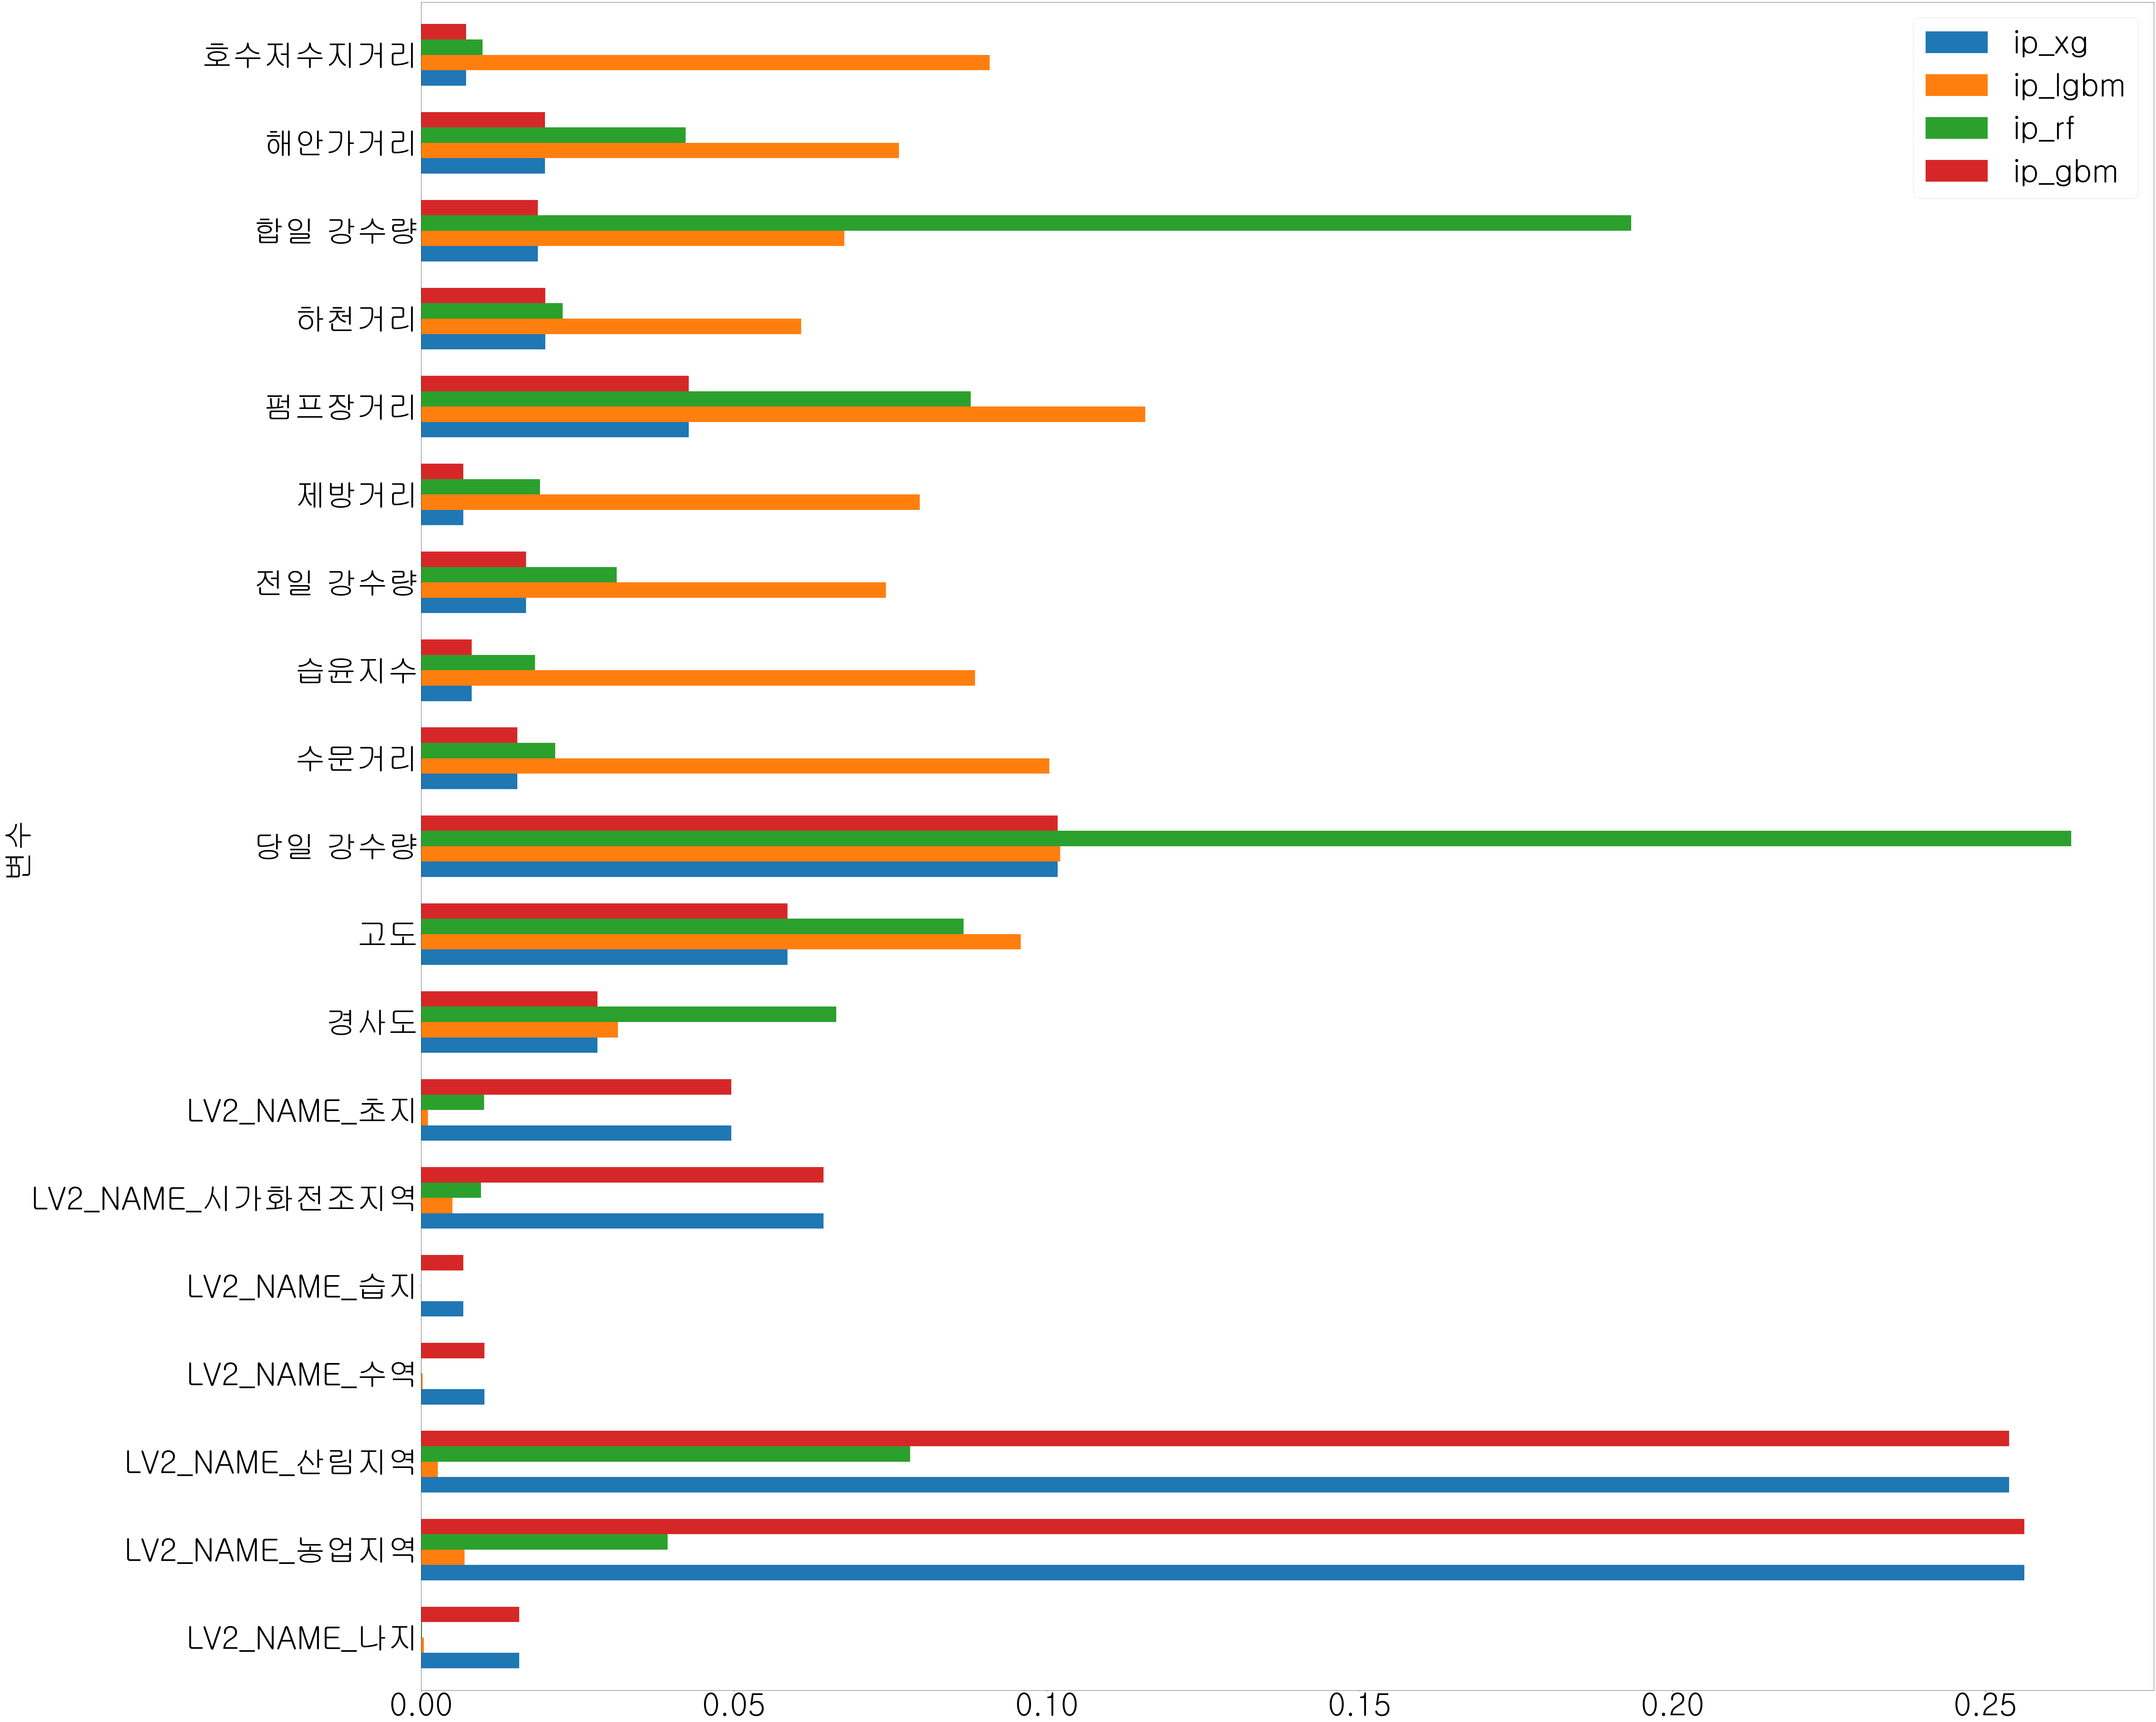

In [173]:
plt.rcParams['figure.figsize'] = (100, 100)
plt.rcParams['font.size'] = 100

ax1 = rr.plot(kind = 'barh', width = 0.7)

In [125]:
b['ip_lgbm'] = b['ip_lgbm'] / b['ip_lgbm'].sum()

In [126]:
b

,변수,ip_lgbm
16,LV2_NAME_습지,0.000025
15,LV2_NAME_수역,0.000243
12,LV2_NAME_나지,0.000439
18,LV2_NAME_초지,0.001066
14,LV2_NAME_산림지역,0.002681
17,LV2_NAME_시가화전조지역,0.004985
13,LV2_NAME_농업지역,0.006942
4,경사도,0.031475
9,하천거리,0.060755
2,강수량,0.067643


In [116]:
a

,변수,ip_xg
16,LV2_NAME_습지,0.006738
7,제방거리,0.006757
10,호수저수지거리,0.007163
5,습윤지수,0.008059
15,LV2_NAME_수역,0.010095
6,수문거리,0.015381
12,LV2_NAME_나지,0.015681
1,sumRnn,0.016749
2,강수량,0.018645
11,해안가거리,0.019793


In [117]:
b

,변수,ip_lgbm
16,LV2_NAME_습지,6
15,LV2_NAME_수역,58
12,LV2_NAME_나지,105
18,LV2_NAME_초지,255
14,LV2_NAME_산림지역,641
17,LV2_NAME_시가화전조지역,1192
13,LV2_NAME_농업지역,1660
4,경사도,7526
9,하천거리,14527
2,강수량,16174


In [118]:
c

,변수,ip_rf
16,LV2_NAME_습지,0.000010
15,LV2_NAME_수역,0.000049
12,LV2_NAME_나지,0.000120
17,LV2_NAME_시가화전조지역,0.009586
10,호수저수지거리,0.009821
18,LV2_NAME_초지,0.010052
5,습윤지수,0.018229
7,제방거리,0.018994
6,수문거리,0.021429
9,하천거리,0.022644


In [119]:
d

,변수,ip_gbm
16,LV2_NAME_습지,0.006738
7,제방거리,0.006757
10,호수저수지거리,0.007163
5,습윤지수,0.008059
15,LV2_NAME_수역,0.010095
6,수문거리,0.015381
12,LV2_NAME_나지,0.015681
1,sumRnn,0.016749
2,강수량,0.018645
11,해안가거리,0.019793


In [109]:
a['lgbm'] = b['변수']
a['rf'] = b['변수']
a['gbm'] = b['변수']

In [111]:
a = a.drop(columns = 'ip_xg')

In [113]:
a = a.rename(columns = {'변수':'xg'})

In [114]:
a

,xg,lgbm,rf,gbm
16,LV2_NAME_습지,LV2_NAME_습지,LV2_NAME_습지,LV2_NAME_습지
7,제방거리,제방거리,제방거리,제방거리
10,호수저수지거리,호수저수지거리,호수저수지거리,호수저수지거리
5,습윤지수,습윤지수,습윤지수,습윤지수
15,LV2_NAME_수역,LV2_NAME_수역,LV2_NAME_수역,LV2_NAME_수역
6,수문거리,수문거리,수문거리,수문거리
12,LV2_NAME_나지,LV2_NAME_나지,LV2_NAME_나지,LV2_NAME_나지
1,sumRnn,sumRnn,sumRnn,sumRnn
2,강수량,강수량,강수량,강수량
11,해안가거리,해안가거리,해안가거리,해안가거리


# 창원시 마산구들 데이터 들고오기

In [626]:
df = pd.read_csv('D:/data/전처리 완료 파일/합포구.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
data = gpd.GeoDataFrame(df, geometry = 'geometry')
data.crs = {"init":"epsg:5186"}
dataaa = data.dropna(subset = ['경사도','LV2_NAME'])

In [627]:
df = pd.read_csv('D:/data/전처리 완료 파일/회원.csv')
df['geometry'] = df['geometry'].apply(wkt.loads)
dataa = gpd.GeoDataFrame(df, geometry = 'geometry')
dataa.crs = {"init":"epsg:5186"}
dataa = dataa.dropna(subset = ['경사도','LV2_NAME'])

In [628]:
data = pd.concat([dataaa,dataa])

In [629]:
dfdf= pd.concat([dataaa,dataa])

In [630]:
len(dfdf)

41206

In [631]:
data['sumRn'] = 130
data['sumRnn'] = 100
data['강수량'] = 230

In [632]:
data = data.reset_index().drop(columns = 'index')

In [633]:
data = data.drop(columns = ['Unnamed: 0','fid_left','geometry'])

In [634]:
data.columns

Index(['godo', 'LV2_NAME', '경사도', '습윤지수', '수문거리', '암거거리', '제방거리', '펌프장거리',
       '하천거리', '호수저수지거리', '해안가거리', 'sumRn', 'sumRnn', '강수량'],
      dtype='object')

In [635]:
data = data.reindex(columns = ['sumRn', 'sumRnn', '강수량','godo', 'LV2_NAME', '경사도', '습윤지수', '수문거리', '제방거리', '펌프장거리', '하천거리','호수저수지거리'])

In [636]:
data.describe()

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리
count,41206.0,41206.0,41206.0,41206.000000,41206.000000,41206.000000,41206.000000,41206.000000,41206.000000,41206.000000,41206.000000
mean,130.0,100.0,230.0,198.558559,16.497136,3.014991,173435.972710,117250.584879,11343.197945,54.267820,505.955751
std,0.0,0.0,0.0,155.874358,8.272787,1.475417,6036.285325,76428.667902,4638.434680,89.650520,376.263386
min,130.0,100.0,230.0,0.000000,0.000000,0.000000,161182.416586,0.000000,7.060754,0.000000,0.000000
25%,130.0,100.0,230.0,75.000000,10.000000,2.460784,168831.317340,708.777271,8358.281158,0.000000,223.485593
50%,130.0,100.0,230.0,157.000000,17.000000,3.073727,172885.036677,161730.929083,11409.725010,16.490756,425.580342
75%,130.0,100.0,230.0,289.000000,23.000000,3.828125,178356.746613,170609.053917,14672.266192,77.099289,710.484382
max,130.0,100.0,230.0,742.000000,48.000000,17.000000,188398.845604,181435.119831,23114.270760,1561.332708,3327.763669


In [637]:
data['해안가거리'] = 0

data['해안가거리'] = data.apply(lambda x: 50 if x['godo'] <= 106 else x['해안가거리'], axis = 1)

In [638]:
data['해안가거리'] = data.apply(lambda x: 300 if x['godo'] <= 231 else x['해안가거리'], axis = 1)

In [639]:
data['해안가거리'] = data.apply(lambda x: 700 if x['godo'] <= 415 else x['해안가거리'], axis = 1)

In [640]:
data['해안가거리'] = data.apply(lambda x: 1200 if x['godo'] > 415 else x['해안가거리'], axis = 1)

In [641]:
data['LV2_NAME'] = data['LV2_NAME'].apply(lambda x: lv2(x))

In [642]:
data

,sumRn,sumRnn,강수량,godo,LV2_NAME,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리
0,130,100,230,12,나지,2.0,0.0,183051.739875,176751.164107,18704.471806,227.569709,2196.123782,700
1,130,100,230,8,나지,2.0,0.0,183141.643968,176840.834544,18794.431528,242.618920,2191.884265,700
2,130,100,230,6,나지,1.0,0.0,183231.548156,176930.505316,18884.391635,268.881458,2191.095913,700
3,130,100,230,9,나지,1.0,0.0,182957.701111,176653.815925,18612.018095,119.422058,2114.533512,700
4,130,100,230,11,나지,1.0,0.0,183047.607141,176743.489922,18701.989427,139.192550,2106.334961,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41201,130,100,230,434,산림지역,26.0,0.0,171572.027469,1217.639167,13435.117397,89.908226,1345.605356,1200
41202,130,100,230,451,산림지역,18.0,0.0,171841.963495,962.412043,13704.898074,3.530042,1310.099122,1200
41203,130,100,230,469,산림지역,7.0,0.0,171931.942216,879.299460,13794.826874,67.052549,1309.487861,1200
41204,130,100,230,445,산림지역,20.0,0.0,172021.920958,797.682982,13884.756596,132.584044,1310.441490,1200


In [643]:
data = pd.get_dummies(data,columns = ['LV2_NAME'])

In [644]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,130,100,230,12,2.0,0.0,183051.739875,176751.164107,18704.471806,227.569709,2196.123782,700,1,0,0,0,0,0,0
1,130,100,230,8,2.0,0.0,183141.643968,176840.834544,18794.431528,242.618920,2191.884265,700,1,0,0,0,0,0,0
2,130,100,230,6,1.0,0.0,183231.548156,176930.505316,18884.391635,268.881458,2191.095913,700,1,0,0,0,0,0,0
3,130,100,230,9,1.0,0.0,182957.701111,176653.815925,18612.018095,119.422058,2114.533512,700,1,0,0,0,0,0,0
4,130,100,230,11,1.0,0.0,183047.607141,176743.489922,18701.989427,139.192550,2106.334961,700,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41201,130,100,230,434,26.0,0.0,171572.027469,1217.639167,13435.117397,89.908226,1345.605356,1200,0,0,1,0,0,0,0
41202,130,100,230,451,18.0,0.0,171841.963495,962.412043,13704.898074,3.530042,1310.099122,1200,0,0,1,0,0,0,0
41203,130,100,230,469,7.0,0.0,171931.942216,879.299460,13794.826874,67.052549,1309.487861,1200,0,0,1,0,0,0,0
41204,130,100,230,445,20.0,0.0,172021.920958,797.682982,13884.756596,132.584044,1310.441490,1200,0,0,1,0,0,0,0


In [645]:
data[col] = scaler.transform(data[col])

In [646]:
data

,sumRn,sumRnn,강수량,godo,경사도,습윤지수,수문거리,제방거리,펌프장거리,하천거리,호수저수지거리,해안가거리,LV2_NAME_나지,LV2_NAME_농업지역,LV2_NAME_산림지역,LV2_NAME_수역,LV2_NAME_습지,LV2_NAME_시가화전조지역,LV2_NAME_초지
0,3.247678,7.410448,4.355408,-0.540299,-0.272727,-2.229379,79.633443,275.486198,-0.743341,0.669204,3.215307,-0.766185,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.247678,7.410448,4.355408,-0.552239,-0.272727,-2.229379,79.672859,275.626259,-0.740612,0.734976,3.207566,-0.766185,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.247678,7.410448,4.355408,-0.558209,-0.363636,-2.229379,79.712276,275.766321,-0.737883,0.849755,3.206127,-0.766185,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.247678,7.410448,4.355408,-0.549254,-0.363636,-2.229379,79.592213,275.334144,-0.746146,0.196549,3.066335,-0.766185,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.247678,7.410448,4.355408,-0.543284,-0.363636,-2.229379,79.631631,275.474211,-0.743417,0.282955,3.051365,-0.766185,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41201,3.247678,7.410448,4.355408,0.719403,1.909091,-2.229379,74.600418,1.310635,-0.903193,0.067560,1.662380,-0.726503,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41202,3.247678,7.410448,4.355408,0.770149,1.181818,-2.229379,74.718765,0.911982,-0.895009,-0.309952,1.597551,-0.726503,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41203,3.247678,7.410448,4.355408,0.823881,0.181818,-2.229379,74.758214,0.782164,-0.892281,-0.032330,1.596435,-0.726503,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41204,3.247678,7.410448,4.355408,0.752239,1.363636,-2.229379,74.797664,0.654683,-0.889553,0.254073,1.598176,-0.726503,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [647]:
datadf = data.copy()

In [648]:
c = lgbmm.predict(data)

In [649]:
dfdf['y'] = c

In [650]:
a = dfdf[dfdf['y'] == 1]

In [651]:
b = a[['geometry','y']]

In [652]:
b

,geometry,y
12,"POLYGON ((343981.061 293139.872, 344161.061 29...",1
39,"POLYGON ((344611.061 292779.872, 344701.061 29...",1
254,"POLYGON ((344521.061 291969.872, 344611.061 29...",1
14545,"POLYGON ((343891.061 283779.872, 343981.061 28...",1
22753,"POLYGON ((331651.061 280449.872, 331741.061 28...",1
22754,"POLYGON ((331741.061 280449.872, 331831.061 28...",1
22972,"POLYGON ((331651.061 280359.872, 331741.061 28...",1
22973,"POLYGON ((331741.061 280359.872, 331831.061 28...",1
22974,"POLYGON ((331831.061 280359.872, 331921.061 28...",1
23182,"POLYGON ((331561.061 280269.872, 331651.061 28...",1


In [653]:
#지오판다스 저장
b.crs = {"init":"epsg:5186"}
b.to_file('D:/130100230.shp', driver='ESRI Shapefile')